In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Diamonds Prices2022.csv')

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [4]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40269 entries, 0 to 40268
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40269 non-null  int64  
 1   carat       40269 non-null  float64
 2   cut         40268 non-null  object 
 3   color       40268 non-null  object 
 4   clarity     40268 non-null  object 
 5   depth       40268 non-null  float64
 6   table       40268 non-null  float64
 7   price       40268 non-null  float64
 8   x           40268 non-null  float64
 9   y           40268 non-null  float64
 10  z           40268 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [5]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           1
color         1
clarity       1
depth         1
table         1
price         1
x             1
y             1
z             1
dtype: int64

In [6]:
data.shape

(40269, 11)

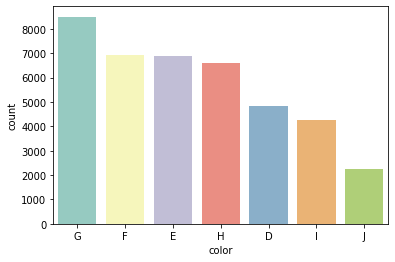

In [7]:
sns.countplot(data=data, x='color', order = data['color'].value_counts().index, palette='Set3')

In [8]:
data['color'].value_counts()

G    8499
F    6923
E    6888
H    6597
D    4824
I    4275
J    2262
Name: color, dtype: int64

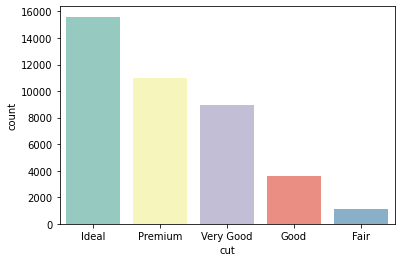

In [9]:
sns.countplot(data=data, x='cut', order = data['cut'].value_counts().index, palette='Set3')

In [10]:
data['cut'].value_counts()

Ideal        15602
Premium      10989
Very Good     8931
Good          3605
Fair          1141
Name: cut, dtype: int64

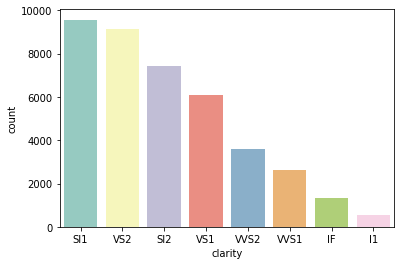

In [11]:
sns.countplot(data=data, x='clarity', order=data['clarity'].value_counts().index, palette='Set3')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


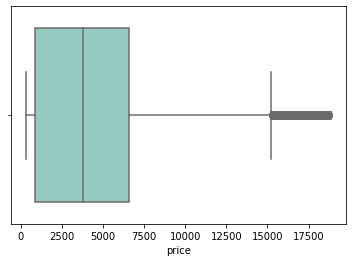

In [12]:
sns.boxplot(data['price'], palette='Set3');

In [13]:
data['price'].describe()

count    40268.000000
mean      4679.903546
std       4358.148716
min        326.000000
25%        863.000000
50%       3816.500000
75%       6608.000000
max      18823.000000
Name: price, dtype: float64

In [14]:
data['volume'] = data['x'] * data['y'] * data['z']

In [15]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,34.505856
2,3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,38.076885
3,4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.917250


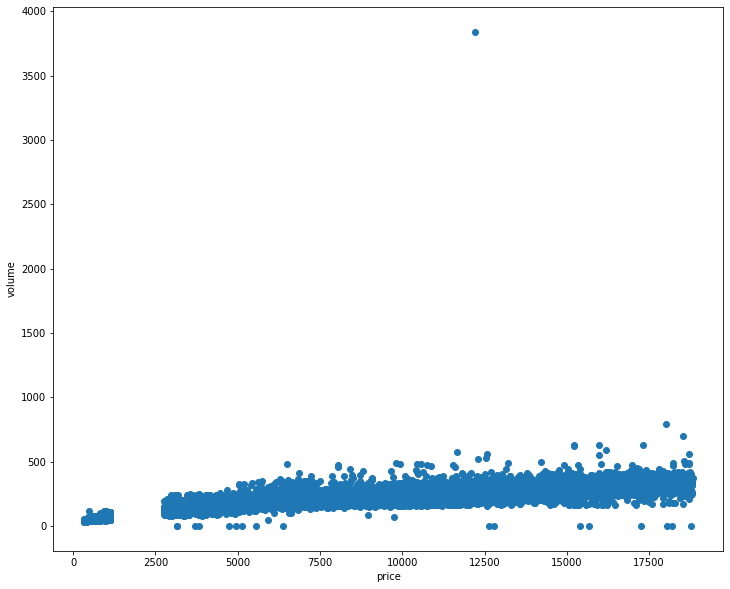

In [16]:
plt.figure(figsize=(12,10))
plt.xlabel('price')
plt.ylabel('volume')
plt.scatter(data['price'].values, data['volume'].values);

In [17]:
q_low = data["volume"].quantile(0.01)
q_hi  = data["volume"].quantile(0.99)

data_filtered = data[(data["volume"] < q_hi) & (data["volume"] > q_low)]

In [18]:
data_filtered.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,volume
3,4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.917250
7,8,0.26,Very Good,H,SI1,61.9,55.0,337.0,4.07,4.11,2.53,42.321081
10,11,0.30,Good,J,SI1,64.0,55.0,339.0,4.25,4.28,2.73,49.658700
13,14,0.31,Ideal,J,SI2,62.2,54.0,344.0,4.35,4.37,2.71,51.515745


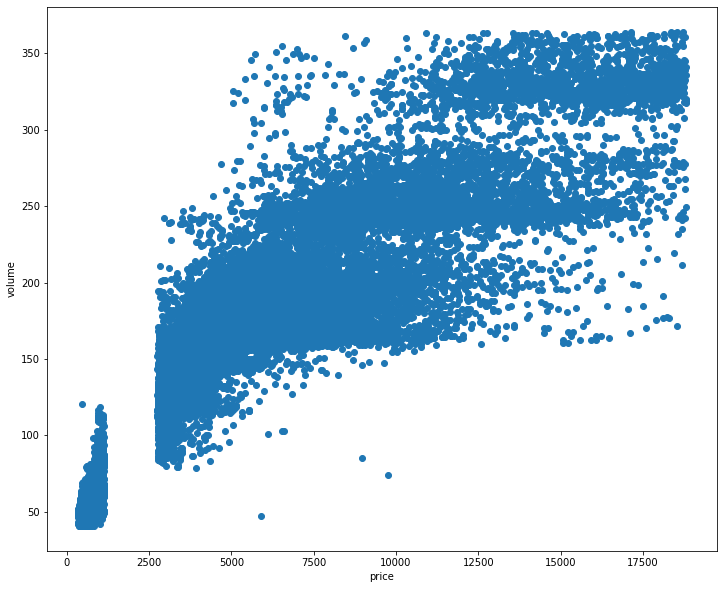

In [19]:
plt.figure(figsize=(12,10))
plt.xlabel('price')
plt.ylabel('volume')
plt.scatter(data_filtered['price'].values, data_filtered['volume'].values);

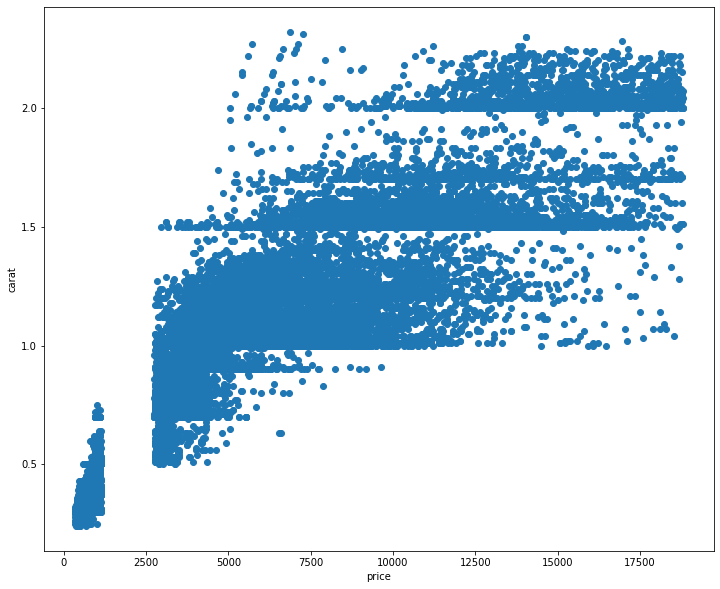

In [20]:
plt.figure(figsize=(12,10))
plt.xlabel('price')
plt.ylabel('carat')
plt.scatter(data_filtered['price'].values, data_filtered['carat'].values);

In [21]:
data = data_filtered

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


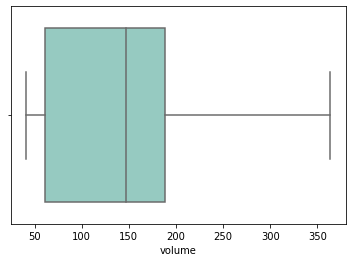

In [22]:
sns.boxplot(data['volume'], palette='Set3');

In [23]:
data['volume'].describe()

count    39462.000000
mean       141.064316
std         79.442007
min         40.777152
25%         60.580932
50%        147.037275
75%        188.476200
max        363.806300
Name: volume, dtype: float64

In [24]:
data = data.drop('Unnamed: 0', axis=1)

In [25]:
y = data['price']
data = data.drop('price', axis=1)
data['price'] = y

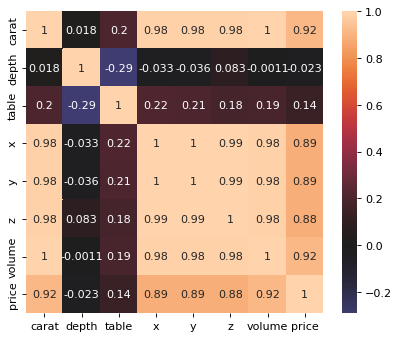

In [26]:
plt.figure(figsize=(6, 5), dpi=80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, center=0, annot=True);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


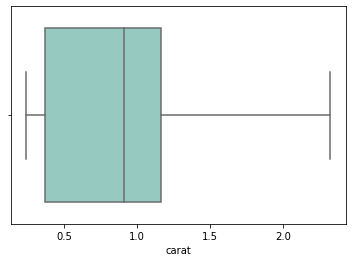

In [27]:
sns.boxplot(data['carat'], palette='Set3');

In [28]:
data['clarity'].value_counts()

SI1     9488
VS2     9018
SI2     7172
VS1     6023
VVS2    3465
VVS1    2504
IF      1293
I1       499
Name: clarity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


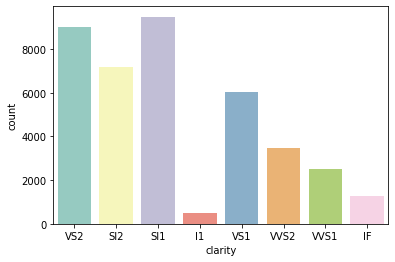

In [29]:
sns.countplot(data['clarity'], palette='Set3');

In [30]:
data.groupby('clarity')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
clarity,,,,,,,,
I1,499.0,4032.168337,2079.278938,345.0,3011.00,3726.0,5573.50,10685.0
IF,1293.0,3331.143078,4465.007726,468.0,886.00,974.0,3543.00,18806.0
SI1,9488.0,4746.369203,4013.228922,337.0,911.75,4389.5,5855.00,18818.0
SI2,7172.0,5519.736336,4078.155858,335.0,3461.00,4425.0,6452.00,18804.0
VS1,6023.0,4565.071725,4360.126497,358.0,818.00,3270.0,7338.00,18795.0
VS2,9018.0,4644.344533,4363.865762,334.0,827.00,3573.0,6781.75,18791.0
VVS1,2504.0,2994.539537,3896.397679,421.0,803.00,978.0,3427.75,18777.0
VVS2,3465.0,4052.737374,4387.653690,375.0,779.00,1050.0,7877.00,18768.0


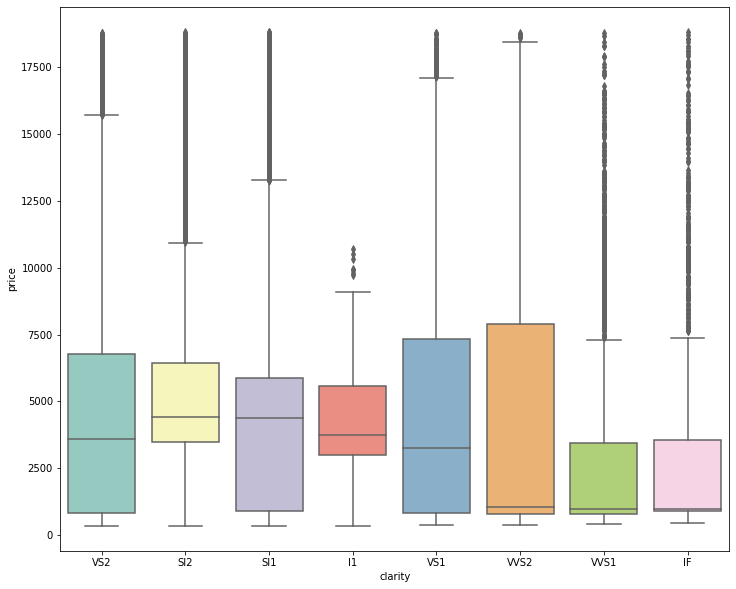

In [31]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='clarity', y='price', data=data, palette='Set3');

Медиана цены выше у бриллиантов с ясностью класса "SL2"

In [32]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,volume,price
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,46.724580,334.0
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,51.917250,335.0
7,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53,42.321081,337.0
10,0.30,Good,J,SI1,64.0,55.0,4.25,4.28,2.73,49.658700,339.0
13,0.31,Ideal,J,SI2,62.2,54.0,4.35,4.37,2.71,51.515745,344.0


In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,volume,price
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,46.724580,334.0
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,51.917250,335.0
7,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53,42.321081,337.0
10,0.30,Good,J,SI1,64.0,55.0,4.25,4.28,2.73,49.658700,339.0
13,0.31,Ideal,J,SI2,62.2,54.0,4.35,4.37,2.71,51.515745,344.0


In [35]:
X = data.drop('price', axis=1)
y = data['price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [37]:
numeric_columns = X_train.select_dtypes(exclude='object').columns
print(numeric_columns)
print('*'*100)
categorical_columns = X_train.select_dtypes(include='object').columns
print(categorical_columns)

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'volume'], dtype='object')
****************************************************************************************************
Index(['cut', 'color', 'clarity'], dtype='object')


In [38]:
numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])

print(numeric_features)
print('*'*100)

categorical_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

print(categorical_features)

processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),
    ('categorical', categorical_features, categorical_columns)
])

Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


In [39]:
def prepare_model(algorithm):
    model = Pipeline(steps= [
        ('processing',processing),
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(X_train, y_train)
    return model

In [43]:
algorithms = [('Linear regression', LinearRegression()), 
              ('KNN regression', KNeighborsRegressor()), 
              ('Random Forest regression', RandomForestRegressor()), 
              ('Adaboost regression', AdaBoostRegressor()), 
              ('Gradientboot regression',GradientBoostingRegressor())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))

In [44]:
print(model_and_score)

{'Linear regression': '76.02117268520512%', 'KNN regression': '88.78686763583062%', 'Random Forest regression': '98.06730779895902%', 'Adaboost regression': '76.48460629463455%', 'Gradientboot regression': '83.98681123638676%'}
